# Import PNAS articles from API

In [1]:
import DAL
pnas = DAL.create('pnas')
pnas_ids = pnas.all_articles()

# Come up with XML parser to extract the articles and implement it to build the vocabulary dictionary for PNAS articles

In [2]:
import time
start_time = time.time()
import re
from bs4 import BeautifulSoup
N = len(pnas_ids)
mydict = {}
for k in range(N):
    body = pnas.byid(pnas_ids[k])['body']
    soup = BeautifulSoup(body)
    text = soup.get_text()
    text = re.sub(r'@[a-zA-Z0-9_]+', "", text) #removes the name of poster and the name after @ 
    text = re.sub(r'[^\x00-\x7F]', "", text) #removes consecutive non-ASCII characters
    text = re.sub(r'&[a-zA-Z0-9_]+', "", text)#removes puntuation with digits and words
    text = re.sub(r'\W', " ", text) #removes anything which is not alphanumeric
    text = re.sub(r'[0-9]', "", text) #removes #s
    text = re.sub(r"\s+", " ", text) #removing white space
    text = text.split(None)
    for word in text:
        if mydict.has_key(word):
            mydict[word] = mydict[word]+1
        else:
            mydict.setdefault(word, 1)

import operator
sortdict = sorted(mydict.iteritems(), key=operator.itemgetter(1), reverse=True)
# print sortdict[:50]    
print "The total runtime would be %s minutes" %((time.time() - start_time)/60)

The total runtime would be 94.4087308804 minutes


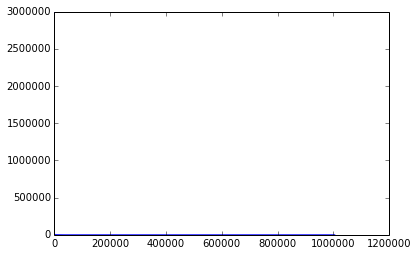

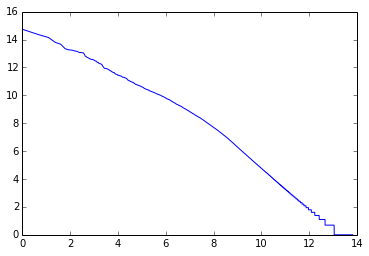

In [3]:
import matplotlib.pyplot as plt
import math

M = len(mydict)
# print M
# print sortdict[:500]
temp_dict = [list(t) for t in zip(*sortdict)]

fig = plt.figure()
plt.plot(range(M),temp_dict[1])   
plt.show()

log_range = [math.log(j) for j in range(1,M)]
log_dictfre = [math.log(i) for i in temp_dict[1][1:]]
fig = plt.figure()
plt.plot(log_range,log_dictfre)   
plt.show()

# The first plot above is the standard scale plot and the second one is the log-scale plot. From these two plots, it is clear that I need to exclude the extremely common, with frequcece greater or equal to 500,000, and rare words. 

# Truncate the dictionary to 50,000 words by excluding extremly common and rare words

In [5]:

dictcts = temp_dict[1]
temp_dictcts = [j for j in dictcts if j >33 and j < 15000]


verbal_base = []
with open("/tmp/pnasvocab", "w") as V:
    for word in mydict.keys():
        if mydict[word] > 40 and mydict[word] < 10000:
            verbal_base.append(word)
            V.write(str(word) + "\n")
N = len(verbal_base)